In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys


import legendre

In [8]:
N = 100
tmax=10
dt = tmax/N

lam = np.logspace(start=-8, stop=2, base=10, num=20)

S_norm_OM  = []
S_norm_MSR = []

for l in lam:
    t = legendre.transform_nomemory(lambda_=l, a=10, D=1, N=N, noise="d", pot="m", tmax=tmax)
    S_G = 2 * (t.Pot_mexico(0) - t.Pot_mexico(-1)) / (1 + l * 10 ** 2)

    #op = t.minimize_full()
    res = t.minimize()
    #S_norm_OM.append(op.fun/S_G)
    S_norm_MSR.append(res.fun/S_G)

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


KeyboardInterrupt: 

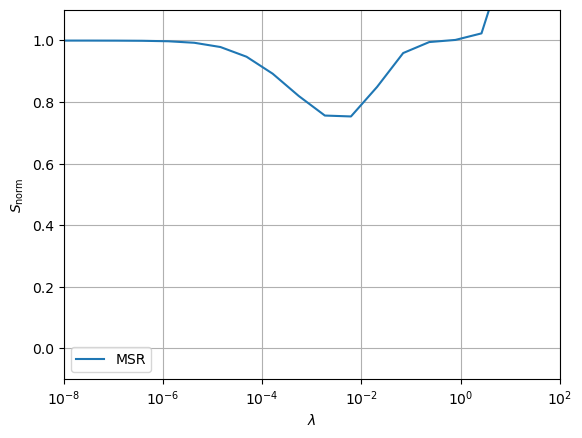

In [ ]:
fig3 = plt.figure()
#plt.plot(lam, S_norm_OM, label="OM")
plt.plot(lam, S_norm_MSR, label="MSR")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$S_\mathrm{norm}$")
plt.xscale("log")
plt.grid()
plt.legend()
plt.axis([min(lam), max(lam), -0.1, 1.1])
plt.savefig("S_norm_test.pdf", dpi=500, bbox_inches="tight")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre


tau = [1.0, 0.2, 0.05]
tmax = 4
N = 150
dt = tmax/N
time = np.linspace(0, tmax, N)

test1 =  legendre.transform(lambda_=0.0, a=0.0, tau=tau[0], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res1 = test1.minimize(in_cond=np.ones(2*N) * (-1e-1))
test2 =  legendre.transform(lambda_=0.0, a=0.0, tau=tau[1], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res2 = test2.minimize(in_cond=np.ones(2*N) * (-1e-1))
test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau[2], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res = test.minimize(in_cond=np.ones(2*N) * (-1e-1))



Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.2519738951362305
            Iterations: 155
            Function evaluations: 47333
            Gradient evaluations: 155
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.320804165865805
            Iterations: 160
            Function evaluations: 48672
            Gradient evaluations: 160
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.1516822194867635
            Iterations: 156
            Function evaluations: 47218
            Gradient evaluations: 156


Text(0, 0.5, '$q$')

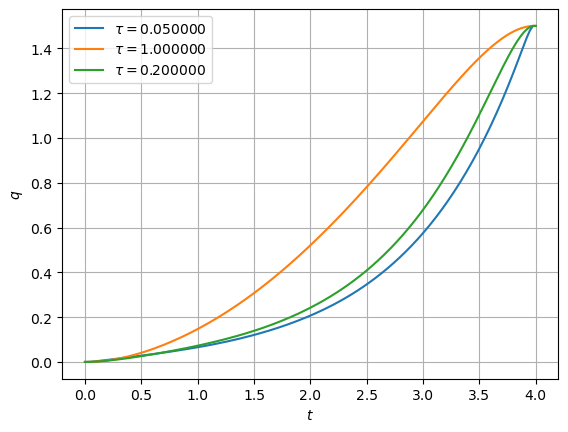

In [ ]:
plt.plot(time, res.x[:N], label=r"$\tau=%f$" % tau[2])
plt.plot(time, res1.x[:N], label=r"$\tau=%f$" % tau[0])
plt.plot(time, res2.x[:N], label=r"$\tau=%f$" % tau[1])
plt.legend()
plt.grid()
plt.xlabel(r"$t$")
plt.ylabel(r"$q$")

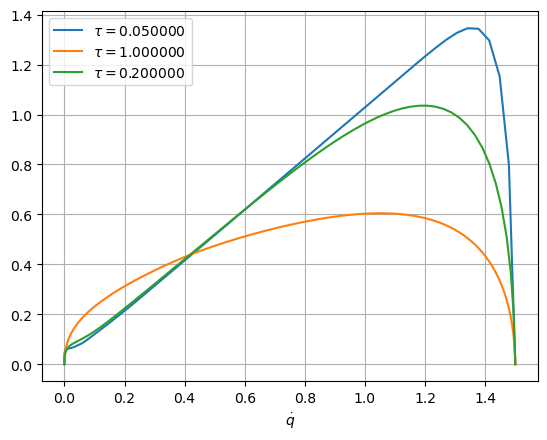

In [ ]:
plt.plot(res.x[:N-1], (res.x[1:N] - res.x[:N-1])/dt, label=r"$\tau=%f$" % tau[2])
plt.plot(res1.x[:N-1], (res1.x[1:N] - res1.x[:N-1])/dt, label=r"$\tau=%f$" % tau[0])
plt.plot(res2.x[:N-1], (res2.x[1:N] - res2.x[:N-1])/dt, label=r"$\tau=%f$" % tau[1])
plt.xlabel(r"$q$")
plt.xlabel(r"$\dot{q}$")
plt.grid()
plt.legend()
plt.show()

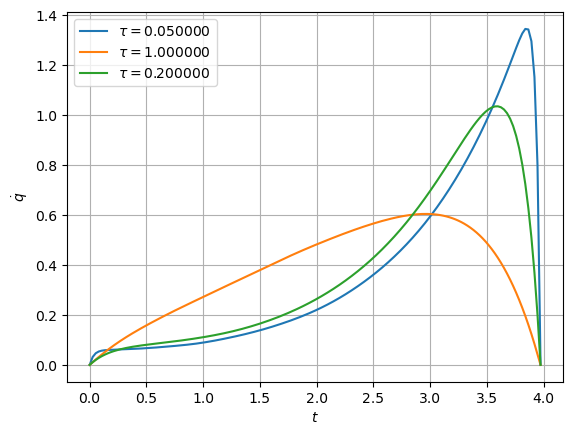

In [ ]:
plt.plot(time[:-1], (res.x[1:N] - res.x[:N-1])/dt, label=r"$\tau=%f$" % tau[2])
plt.plot(time[:-1], (res1.x[1:N] - res1.x[:N-1])/dt, label=r"$\tau=%f$" % tau[0])
plt.plot(time[:-1], (res2.x[1:N] - res2.x[:N-1])/dt, label=r"$\tau=%f$" % tau[1])
plt.xlabel(r"$t$")
plt.ylabel(r"$\dot{q}$")
plt.grid()
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre


tau = [1.0, 0.2, 0.05]
tmax = 4
N = 150
dt = tmax/N
time = np.linspace(0, tmax, N)

test_2 =  legendre.transform(lambda_=0.01, a=10.0, tau=tau[-1], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res_2 = test_2.minimize(in_cond=np.ones(2*N) * (-1e-1))
test_3 =  legendre.transform(lambda_=0.1, a=10.0, tau=tau[-1], D1=0, D2=2, N=N, noise="d", pot="h", tmax=tmax, const_i=0, const_f=1.5)
res_3 = test_3.minimize(in_cond=np.ones(2*N) * (-1e-1))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4719352904551208
            Iterations: 162
            Function evaluations: 49017
            Gradient evaluations: 162
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.16662742830688684
            Iterations: 175
            Function evaluations: 52893
            Gradient evaluations: 175


Text(0, 0.5, '$q$')

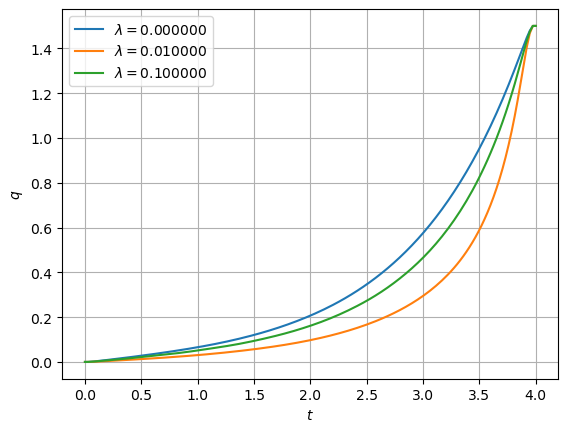

In [ ]:
plt.plot(time, res.x[:N], label=r"$\lambda=%f$" % 0)
plt.plot(time, res_2.x[:N], label=r"$\lambda=%f$" % 0.01)
plt.plot(time, res_3.x[:N], label=r"$\lambda=%f$" % 0.10)
plt.legend()
plt.grid()
plt.xlabel(r"$t$")
plt.ylabel(r"$q$")

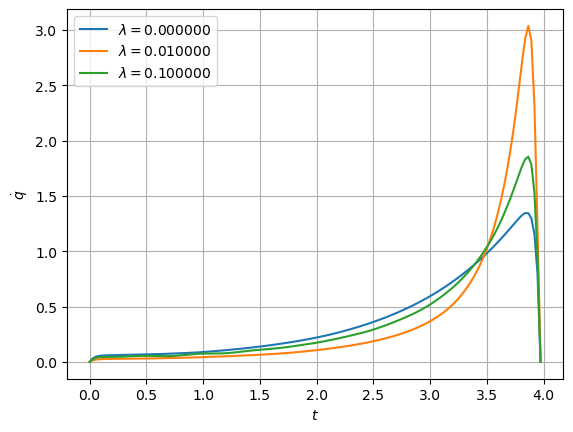

In [ ]:
plt.plot(time[:-1], (res.x[1:N] - res.x[:N-1])/dt, label=r"$\lambda=%f$" % 0)
plt.plot(time[:-1], (res_2.x[1:N] - res_2.x[:N-1])/dt, label=r"$\lambda=%f$" % 0.01)
plt.plot(time[:-1], (res_3.x[1:N] - res_3.x[:N-1])/dt, label=r"$\lambda=%f$" % 0.1)
plt.xlabel(r"$t$")
plt.ylabel(r"$\dot{q}$")
plt.grid()
plt.legend()
plt.show()

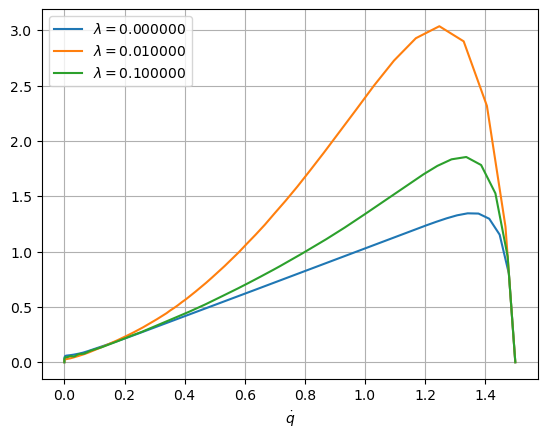

In [ ]:
plt.plot(res.x[:N-1], (res.x[1:N] - res.x[:N-1])/dt, label=r"$\lambda=%f$" % 0)
plt.plot(res_2.x[:N-1], (res_2.x[1:N] - res_2.x[:N-1])/dt, label=r"$\lambda=%f$" % 0.01)
plt.plot(res_3.x[:N-1], (res_3.x[1:N] - res_3.x[:N-1])/dt, label=r"$\lambda=%f$" % 0.1)
plt.xlabel(r"$q$")
plt.xlabel(r"$\dot{q}$")
plt.grid()
plt.legend()
plt.show()

# $\tau$ dependence of action

Can show that for a harmonic potential $V(q)=q^2/2$ the action becomes $S(\tau) = x_f^2(1+\tau)/D$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

tmax = 10
N = 150
dt = tmax/N
time = np.linspace(0, tmax, N)

tau = np.linspace(0, 0.99, 10)
xf = 1.5

# for V(q) = q^4 / 4 - q^2 / 2 from -1 to 0

def AP_pred(tau):
    x0 = -1
    xf = 0

    return 1/4  - tau ** 2 / 2 * (-0.25) #- tau**4 * 0.3

def MY_pred(tau):
    x0 = 0
    xf = 1.5
    return (xf**4 / 4 - 3*xf**3 / 2 + 9*xf**2 / 4) - (x0**4 / 4 - 3*x0**3 / 2 + 9*x0**2 / 4)  - tau ** 2 / 2 * (-6.40723) + tau / 2 * (xf**3 - 9*xf**2 / 2 + 9 * xf / 2)


def S_expected(tau):
    return xf**2 * (1 + tau) / 2





In [ ]:
def action(tau, pot, ini, fin):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(2*N) * (-1e-1))
    return res.fun

def action1(tau, pot, ini, fin):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(2*N) * (-1e-6))
    return res.fun

def action2(tau, pot, ini, fin, N=150):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(2*N) * (-1e-6))
    return res.fun

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

tmax = 10
N = 150
dt = tmax/N
time = np.linspace(0, tmax, N)


tau = np.logspace(start=0, stop=2, num=10, base=10, endpoint=True)

def action2(tau, pot, ini, fin, N=250, maxiter=1500):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(2*N) * (-1e-6), maxiter=maxiter)
    return res.fun

[0.24995488 0.24994876 0.24996693 0.25007372 0.25040768 0.25150036
 0.25454393 0.26215753 0.27897037 0.31244737]
[0.06091299 0.04146483 0.01604221 0.02144097 0.07108267 0.15682615
 0.284729   0.45669235 0.65239415 0.84303952]
0.07407407407407407


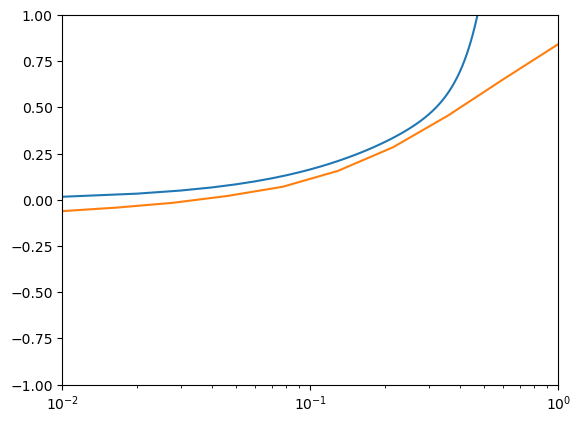

In [ ]:
def g(t):
    dV = 1/4
    return dV* ( 1  + 0.5 * t**2 - 6/5 * t**4 + 279/35 * t**6)

t = np.linspace(1e-2, 1, 100)
#plt.plot(tau, S3)
#plt.plot(tau, S4)
S5 = np.array(S5)
plt.plot(t, (g(t)- AP_pred(0))/(8/27 * t * AP_pred(0)))
plt.plot(tau, (S5 - AP_pred(0))/(8/27 * tau * AP_pred(0)))
plt.xscale("log")
#plt.yscale("log")

print(S5)
plt.axis([1e-2, 1e0, -1, 1])
print(np.abs(S5-AP_pred(0))/(8/27 * tau*AP_pred(0)))
print(8/27 * AP_pred(0))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

tmax = 1000
N = 500
dt = tmax/N
time = np.linspace(0, tmax, N)

def actionTest(tau, pot, ini, fin, N=250, maxiter=1500):
    test =  legendre.TransformLargeTau(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(N) * (-1), guess=np.ones(N) * (-1e-6), maxiter=maxiter)
    return res.fun, res.x

def action2(tau, pot, ini, fin, N=250, maxiter=1500):
    test =  legendre.transform(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(in_cond=np.ones(N) * (-1e-6), maxiter=maxiter)
    return res.fun, res.x[:N]

def action_adj(tau, pot, ini, fin, N=250, maxiter=1500):
    test =  legendre.transform_adjust(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tmax, const_i=ini, const_f=fin)
    res = test.minimize(maxiter=maxiter)
    return res.fun, res.x[:N]


#R = actionTest(100, "m", -1, 0, N=N)[-1]

#R1 = action2(100, "m", -1, 0, N=N)[-1]







In [ ]:
R2 = action_adj(100, "m", -1, 0, N=N)[-1]

Optimization terminated successfully    (Exit mode 0)
            Current function value: 7.989098649340517
            Iterations: 501
            Function evaluations: 252914
            Gradient evaluations: 501


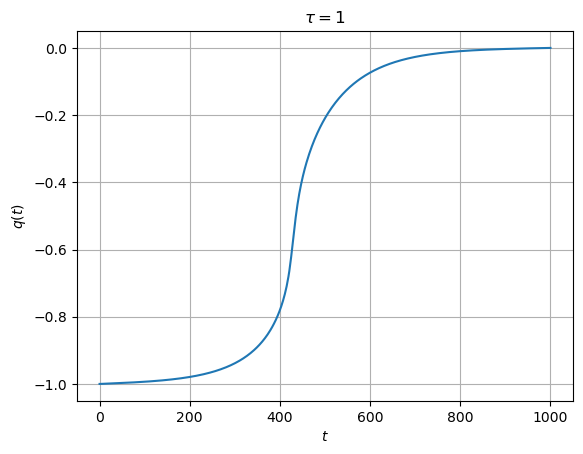

In [ ]:
#plt.plot(np.linspace(0, tmax, N), R)
#plt.plot(np.linspace(0, tmax, N), R1)
plt.plot(np.linspace(0, tmax, N), R2)
plt.xlabel(r"$t$")
plt.ylabel(r"$q(t)$")
plt.grid()
plt.title(r"$\tau=100$")
plt.show()

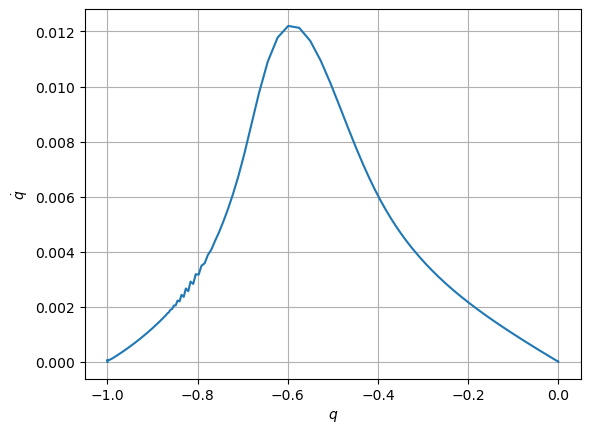

In [ ]:
plt.plot(R2[:-1], (R2[1:] - R2[:-1]) / dt)
#plt.plot(R1[:-1], (R1[1:] - R1[:-1]) / dt)
plt.xlabel(r"$q$")
plt.ylabel(r"$\dot{q}$")
plt.grid()
plt.show()

# Fix large tau limit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

tau = np.logspace(0, 2, base=10, endpoint=True, num=10)
N = 200
tmax = 1000
time = np.linspace(0, tmax, N)

def action_adj(tau, pot, ini, fin, N=250, maxiter=1500, tmax=tmax):
    test =  legendre.transform_adjust(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tm, const_i=ini, const_f=fin)
    res = test.minimize( maxiter=maxiter)
    #res = test.minimize(maxiter=maxiter)
    return res.fun, res.x[:N]


instanton = np.linspace(-1, 0, N)

S = []
n = [300, 300, 300, 300, 300, 300, 500, 500, 550, 550]
tmax=[100,200, 300, 300, 300, 300, 1000, 1000, 1000, 1000]


i = 0
for t in tau:
    tm = tmax[i]
    N = n[i] #* (1+int(np.log(t)))
    s, instanton = action_adj(t, "m", -1, 0, N=N, tmax=tm)
    print(tm, N, t)
    if t == tau[0]:
        inst = instanton
    S.append(s)
    i += 1







Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2971724955319758
            Iterations: 119
            Function evaluations: 36056
            Gradient evaluations: 119
100 300 1.0
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3362294529444075
            Iterations: 67
            Function evaluations: 20296
            Gradient evaluations: 67
200 300 1.6681005372000588
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.417001148059744
            Iterations: 61
            Function evaluations: 18479
            Gradient evaluations: 61
300 300 2.7825594022071245
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.584301625509048
            Iterations: 98
            Function evaluations: 29692
            Gradient evaluations: 98
300 300 4.641588833612778
Optimization terminated successfully    (Exit mode 0)
  

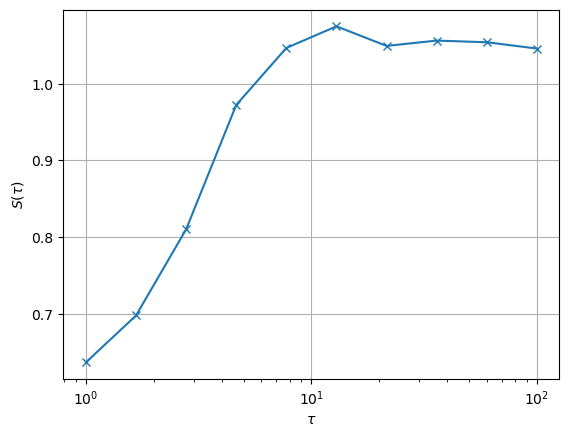

[  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]


In [ ]:
plt.plot(tau, (np.array(S)-0.25) /(2/27* tau), "x-")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$S(\tau)$")
plt.grid()
plt.xscale("log")
plt.show()


[  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]


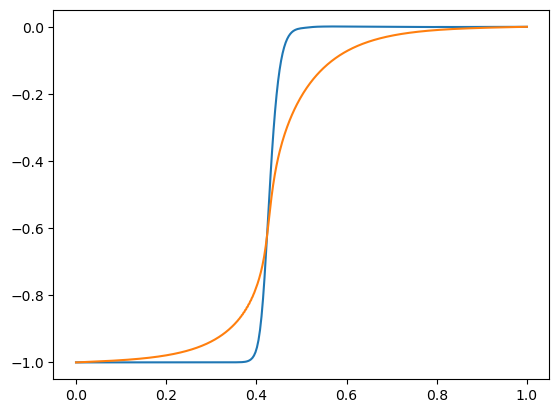

[-1.00000000e+00 -1.00000000e+00 -1.00000030e+00 -1.00003478e+00
 -1.00004738e+00 -1.00004815e+00 -1.00003171e+00 -1.00000906e+00
 -1.00000847e+00 -1.00002633e+00 -1.00004927e+00 -1.00005993e+00
 -1.00006372e+00 -1.00006427e+00 -1.00006846e+00 -1.00006760e+00
 -1.00006470e+00 -1.00005731e+00 -1.00004889e+00 -1.00003809e+00
 -1.00002648e+00 -1.00002052e+00 -1.00001902e+00 -1.00003035e+00
 -1.00004081e+00 -1.00005587e+00 -1.00005678e+00 -1.00005160e+00
 -1.00003221e+00 -1.00000799e+00 -9.99985047e-01 -9.99965736e-01
 -9.99963847e-01 -9.99970919e-01 -9.99992514e-01 -1.00001335e+00
 -1.00002397e+00 -1.00001932e+00 -9.99990846e-01 -9.99955045e-01
 -9.99919224e-01 -9.99900417e-01 -9.99910690e-01 -9.99933674e-01
 -9.99965987e-01 -9.99978050e-01 -9.99961092e-01 -9.99931436e-01
 -9.99895720e-01 -9.99889050e-01 -9.99912101e-01 -9.99938879e-01
 -9.99958824e-01 -9.99945137e-01 -9.99913201e-01 -9.99907778e-01
 -9.99923856e-01 -9.99953195e-01 -9.99975897e-01 -9.99955392e-01
 -9.99934541e-01 -9.99966

In [ ]:
t1 = np.linspace(0, tmax[0], n[0])/tmax[0]
t2 = np.linspace(0, tmax[-1], n[-1])/tmax[-1]
plt.plot(t1, inst)
plt.plot(t2, instanton)
plt.show()


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24995664719510244
            Iterations: 69
            Function evaluations: 13938
            Gradient evaluations: 69


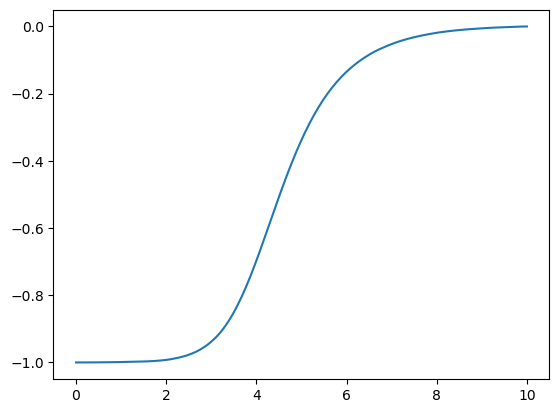

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed


def action_adj(tau, pot, ini, fin, tm, N=250, maxiter=1500):
    test =  legendre.transform_adjust(lambda_=0.0, a=0.0, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tm, const_i=ini, const_f=fin)
    res = test.minimize( maxiter=maxiter)
    #res = test.minimize(maxiter=maxiter)
    return res.fun, res.x[:N]


tm = 10
N = 200

Act, Inst = action_adj(tau=0, pot="m", ini=-1, fin=0, N=200, tm=tm, maxiter=1500)
t = np.linspace(0, tm, N)

plt.plot(t, Inst)

In [ ]:
tau = np.zeros(11)
tau[1:] = np.logspace(-2, -1, base=10, endpoint=True, num=10)
n = []
tm = []
for i in range(len(tau[tau<=1])):
    n.append(300)
    tm.append(10)



# k = [300, 300, 300, 300, 300, 300, 500, 500, 550, 550]
# tx=[100,200, 300, 300, 300, 300, 1000, 1000, 1000, 1000]



# for i in range(10):
#     n.append(k[i])
#     tm.append(tx[i])

# k = np.ones(len(tau)-len(n), dtype=int) * 1000
# tx= np.ones(len(tau)-len(n)) * 10000

# for i in range(len(tau)-len(n)):
#     n.append(k[i])
#     tm.append(tx[i])

# print(tau)
# print(len(tau)-len(n))
# print(n)

In [ ]:
def action_adj(tau, pot, ini, fin, tm, N=250, maxiter=1500, lambd=0, a=0):
    test =  legendre.transform_adjust(lambda_=lambd, a=a, tau=tau, D1=0, D2=2, N=N, noise="d", pot=pot, tmax=tm, const_i=ini, const_f=fin)
    res = test.minimize( maxiter=maxiter)
    #res = test.minimize(maxiter=maxiter)
    return res.fun


S = Parallel(n_jobs=5)(delayed(action_adj)(tau=tau[i], pot="m", ini=-1, fin=0, tm=tm[i], N=n[i]) for i in range(len(tau)))
#S2 = Parallel(n_jobs=5)(delayed(action_adj)(tau=tau[i], pot="m", ini=-1, fin=0, tm=tm[i], N=n[i], lambd=0.01, a=1) for i in range(len(tau)))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24994876482558753
            Iterations: 56
            Function evaluations: 16912
            Gradient evaluations: 56
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24995487926106197
            Iterations: 60
            Function evaluations: 18120
            Gradient evaluations: 60
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24995052179828245
            Iterations: 57
            Function evaluations: 17214
            Gradient evaluations: 57
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24995183189714898
            Iterations: 58
            Function evaluations: 17516
            Gradient evaluations: 58
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24999238095421794
            Iterations: 116
      

0.24999238095421794 0.24995664719510244
[0.         0.01       0.0129155  0.01668101 0.02154435 0.02782559
 0.03593814 0.04641589 0.05994843 0.07742637 0.1       ]


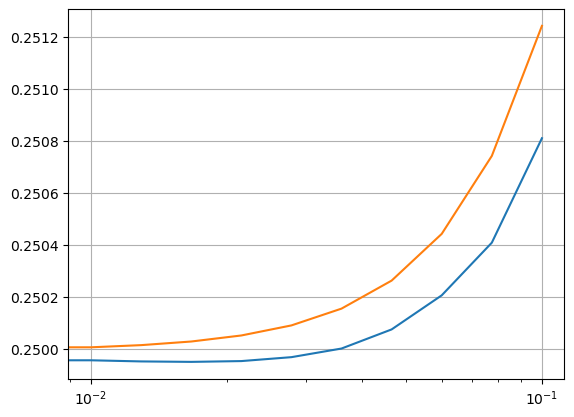

In [ ]:
def g(t):
    dV = S[0]
    return dV* ( 1  + 0.5 * t**2 )#- 6/5 * t**4 + 279/35 * t**6)

print(S[0], Act)
tau = np.array(tau)
print(tau)
plt.plot(tau[:], S[:])
#plt.plot(tau[1:], S2[1:])
plt.plot(tau[:], g(tau[:]))
plt.xscale("log")
#plt.yscale("log")
plt.grid()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

def action_adj(tau, pot, ini, fin, tm, N=250, maxiter=1500, lambd=0, a=0, init_cond=np.zeros(400), noise="d", b=1/2):
    test =  legendre.transform_adjust_2(lambda_=lambd, a=a, tau=tau, D1=0, D2=1, N=N, noise=noise, pot=pot, tmax=tm, const_i=ini, const_f=fin, b=b)
    res = test.minimize( maxiter=maxiter, in_cond=init_cond)
    return res.fun

N = 300
tau = 1e-3
tau2 = 1e-2
tau3 = 1e-1
tau4 = 1e0
tm = 10

l = np.logspace(-8, 2, base=10, num=20, endpoint=True)
alp = np.logspace(-2, 2, base=10, num=20,endpoint=True)


In [3]:

S_l = []
S_lt = []
S_lt0 = []
S_l0 = []

for L in l:
    print(" ############################################################################################################# ")
    S_l.append(action_adj(tau=tau, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L))
    S_lt.append(action_adj(tau=tau, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L))
    S_l0.append(action_adj(tau=0, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L))
    S_lt0.append(action_adj(tau=0, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=L))

 ############################################################################################################# 
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499920
         Iterations: 336
         Function evaluations: 140878
         Gradient evaluations: 468
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499908
         Iterations: 210
         Function evaluations: 77669
         Gradient evaluations: 258
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499928
     

In [4]:


S_a0 = []
S_a = []
S_at = []
S_at0 = []
for a in alp:
    print("###################################################################")
    S_a.append(action_adj(tau=tau, pot="m", ini=-1, fin=0, tm=tm, N=N, a=a, lambd=0.01))
    S_at.append(action_adj(tau=tau, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=a, lambd=0.01))
    S_at0.append(action_adj(tau=0, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=a, lambd=0.01))
    
    S_a0.append(action_adj(tau=0, pot="m", ini=-1, fin=0, tm=tm, N=N, a=a, lambd=0.01))


###################################################################
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499929
         Iterations: 235
         Function evaluations: 97534
         Gradient evaluations: 324
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499929
         Iterations: 220
         Function evaluations: 77970
         Gradient evaluations: 259
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 0.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499937
         Iterations: 238
         Function eva

/home/vetkje/Documents/Internship/numerics/legendre.py:96: RuntimeWarning: overflow encountered in cosh
  return np.cosh(x) - 1


         Current function value: 0.005245
         Iterations: 6
         Function evaluations: 15057
         Gradient evaluations: 50
lambda 	|	 1.000000e-02
 a 	|	 100.000000 
 tau 	|	 0.001000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.004976
         Iterations: 22
         Function evaluations: 48774
         Gradient evaluations: 162
lambda 	|	 1.000000e-02
 a 	|	 100.000000 
 tau 	|	 0.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.005042
         Iterations: 11
         Function evaluations: 33718
         Gradient evaluations: 112
lambda 	|	 1.000000e-02
 a 	|	 100.000000 
 tau 	|	 0.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2



/home/vetkje/Documents/Internship/numerics/legendre.py:96: RuntimeWarning: overflow encountered in cosh
  return np.cosh(x) - 1


         Current function value: 0.005070
         Iterations: 36
         Function evaluations: 72852
         Gradient evaluations: 242


In [5]:

S_l2 = []
S_lt2 = []
S_a2 = []
S_at2 = []
for i in range(len(alp)):
    print("###################################################################")
    S_a2.append(action_adj(tau=tau2, pot="m", ini=-1, fin=0, tm=tm, N=N, a=alp[i], lambd=0.01))
    S_at2.append(action_adj(tau=tau2, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=alp[i], lambd=0.01))
    S_l2.append(action_adj(tau=tau2, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[i]))
    S_lt2.append(action_adj(tau=tau2, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[i]))
    

###################################################################
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 0.010000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499877
         Iterations: 259
         Function evaluations: 101148
         Gradient evaluations: 336
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 0.010000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499878
         Iterations: 125
         Function evaluations: 47268
         Gradient evaluations: 157
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.010000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.499869
         Iterations: 124
         Function evaluati

/home/vetkje/Documents/Internship/numerics/legendre.py:96: RuntimeWarning: overflow encountered in cosh
  return np.cosh(x) - 1


         Current function value: 0.004664
         Iterations: 71
         Function evaluations: 90916
         Gradient evaluations: 302
lambda 	|	 1.000000e-02
 a 	|	 100.000000 
 tau 	|	 0.010000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.004762
         Iterations: 34
         Function evaluations: 50586
         Gradient evaluations: 168
lambda 	|	 1.000000e+02
 a 	|	 10.000000 
 tau 	|	 0.010000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: -0.302943
         Iterations: 2
         Function evaluations: 29811
         Gradient evaluations: 99
lambda 	|	 1.000000e+02
 a 	|	 10.000000 
 tau 	|	 0.010000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current 

In [3]:

S_l3 = []
S_lt3 = []
S_a3 = []
S_at3 = []
for i in range(len(alp)):
    print("###################################################################")
    S_a3.append(action_adj(tau=tau3, pot="m", ini=-1, fin=0, tm=tm, N=N, a=alp[i], lambd=0.01))
    S_at3.append(action_adj(tau=tau3, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=alp[i], lambd=0.01))
    S_l3.append(action_adj(tau=tau3, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[i]))
    S_lt3.append(action_adj(tau=tau3, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[i]))

###################################################################
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.501587
         Iterations: 299
         Function evaluations: 103255
         Gradient evaluations: 343
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: truncated coefficient 0.500000
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.501587
         Iterations: 299
         Function evaluations: 101148
         Gradient evaluations: 336
lambda 	|	 1.000000e-08
 a 	|	 10.000000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.501580
         Iterations: 299
         Function evaluat

In [ ]:
S_l4 = []
S_lt4 = []
S_a4 = []
S_at4 = []
for i in range(len(alp)):
    print("###################################################################")
    S_a4.append(action_adj(tau=tau4, pot="m", ini=-1, fin=0, tm=tm, N=N, a=alp[i], lambd=0.01))
    S_at4.append(action_adj(tau=tau4, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=alp[i], lambd=0.01))
    S_l4.append(action_adj(tau=tau4, pot="m", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[i]))
    S_lt4.append(action_adj(tau=tau4, pot="m", noise="t", ini=-1, fin=0, tm=tm, N=N, a=10, lambd=l[i]))

###################################################################
lambda 	|	 1.000000e-02
 a 	|	 0.010000 
 tau 	|	 1.000000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2



ValueError: A value in x_new is below the interpolation range.

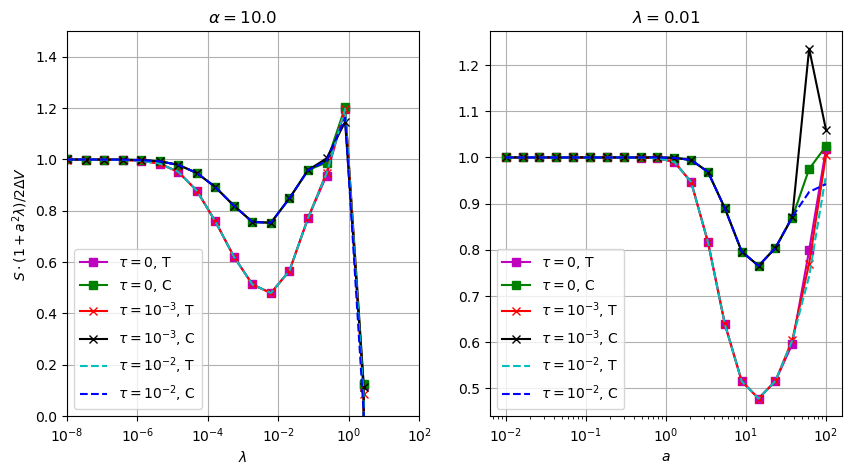

In [8]:
#print(S_l[0][0])
# s_l = []
# s_l0 = []
# for i in range(len(S_l)):
#     s_l.append(S_l[i][0])
#     s_l0.append(S_l0[i][0])

#np.savetxt("test_data.txt", [S_l, S_l0, S_lt, S_lt0, S_a, S_a0, S_at, S_at0, S_l2, S_lt2, S_a2, S_at2])

# data = np.loadtxt("test_data.txt")
# S_l = data[0]
# S_l0 = data[0]
# S_lt = data[0]
# S_lt0 = data[0]
# S_a = data[0]
# S_a0 = data[0]
# S_at = data[0]
# S_at0 = data[0]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].plot(l, np.array(S_lt0) * (1 + 10**2 * l)/(2*0.25), "m-s", label=r"$\tau=0$, T")
ax[0].plot(l, np.array(S_l0) * (1 + 10**2 * l)/(2*0.25), "g-s", label=r"$\tau=0$, C")
ax[0].plot(l, np.array(S_lt) * (1 + 10**2 * l)/(2*0.25), "r-x", label=r"$\tau=10^{-3}$, T")
ax[0].plot(l, np.array(S_l) * (1 + 10**2 * l)/(2*0.25), "k-x", label=r"$\tau=10^{-3}$, C")
ax[0].plot(l, np.array(S_lt2) * (1 + 10**2 * l)/(2*0.25), "c--", label=r"$\tau=10^{-2}$, T")
ax[0].plot(l, np.array(S_l2) * (1 + 10**2 * l)/(2*0.25), "b--", label=r"$\tau=10^{-2}$, C")
ax[1].plot(alp[:len(S_at0)], np.array(S_at0[:len(S_at0)])* (1 + alp[:len(S_at0)]**2 * 0.01)/(2*0.25), "m-s", label=r"$\tau=0$, T")
ax[1].plot(alp[:len(S_a0)], np.array(S_a0[:len(S_a0)])* (1 + alp[:len(S_a0)]**2 * 0.01)/(2*0.25), "g-s", label=r"$\tau=0$, C")
ax[1].plot(alp[:len(S_at)], np.array(S_at[:len(S_at)])* (1 + alp[:len(S_at)]**2 * 0.01)/(2*0.25), "r-x", label=r"$\tau=10^{-3}$, T")
ax[1].plot(alp[:len(S_a)], np.array(S_a[:len(S_a)])* (1 + alp[:len(S_a)]**2 * 0.01)/(2*0.25), "k-x", label=r"$\tau=10^{-3}$, C")
ax[1].plot(alp[:len(S_at2)], np.array(S_at2[:len(S_at2)])* (1 + alp[:len(S_at2)]**2 * 0.01)/(2*0.25), "c--", label=r"$\tau=10^{-2}$, T")
ax[1].plot(alp[:len(S_a2)], np.array(S_a2[:len(S_a2)])* (1 + alp[:len(S_a2)]**2 * 0.01)/(2*0.25), "b--", label=r"$\tau=10^{-2}$, C")
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel(r"$\lambda$")
ax[1].set_xlabel(r"$a$")
ax[0].set_ylabel(r"$S\cdot(1+a^2\lambda)/2\Delta V$")
ax[0].grid()
ax[1].grid()
ax[0].axis([1e-8, 1e2, 0, 1.5])
ax[1].set_title(r"$\lambda=0.01$")
ax[0].set_title(r"$\alpha=10.0$")
ax[0].set_xscale("log")
ax[1].set_xscale("log")
#plt.savefig("better.pdf", dpi=500)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc
from numba import njit, jit
import sys
import legendre
from joblib import Parallel, delayed

def action_adj_2(tau, pot, ini, fin, tm, N=250, maxiter=1500, lambd=0, a=0, init_cond=np.ones(400), noise="d", b=1/2):
    test =  legendre.transform_adjust_2(lambda_=lambd, a=a, tau=tau, D1=0, D2=1, N=N, noise=noise, pot=pot, tmax=tm, const_i=ini, const_f=fin, b=b)
    res = test.minimize( maxiter=maxiter, in_cond=init_cond)
    return res.fun,res.x[:N]

N = 300
tau = 1e-3
tau2 = 1e-2
tau3 = 1e-1
tau4 = 1e0
tm = 10

l = np.logspace(-8, 2, base=10, num=20, endpoint=True)
alp = np.logspace(-2, 2, base=10, num=20,endpoint=True)


#Act, Inst = action_adj(tau=0.0, pot="m", noise="d", ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=0, lambd=0)
Act3, Inst3 = action_adj_2(tau=tau3, pot="m", noise="d",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=alp[0], lambd=0.0001)
print("%f" % Act3)
#Act2, Inst2 = action_adj(tau=0.0, pot="m", noise="t",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=0, lambd=0)
#Act4, Inst4 = action_adj(tau=0.0, pot="m", noise="t",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=a, lambd=l, b=1/2)
#Act5, Inst5 = action_adj(tau=0.0, pot="m", noise="t",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=a, lambd=1e-8, b=1/2, init_cond=Inst4)

#Act6, Inst6 = action_adj(tau=0.0, pot="m", noise="e",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=0, lambd=0)
#Act7, Inst7 = action_adj(tau=0.0, pot="m", noise="e",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=a, lambd=l, b=1/2)
#Act8, Inst8 = action_adj(tau=0.0, pot="m", noise="e",ini=-1, fin=0, N=N, tm=tm, maxiter=1500, a=a, lambd=1e-8, b=1/2, init_cond=Inst4)


lambda 	|	 1.000000e-04
 a 	|	 0.010000 
 tau 	|	 0.100000 
 D 	|	 1.000000 
 tmax 	|	 10.000000
 N 	|	 300

Noise: symmetric delta at +- 1
Potential: quartic potential q^4/4 - q^2/2

         Current function value: 0.501587
         Iterations: 299
         Function evaluations: 105362
         Gradient evaluations: 350
0.501587


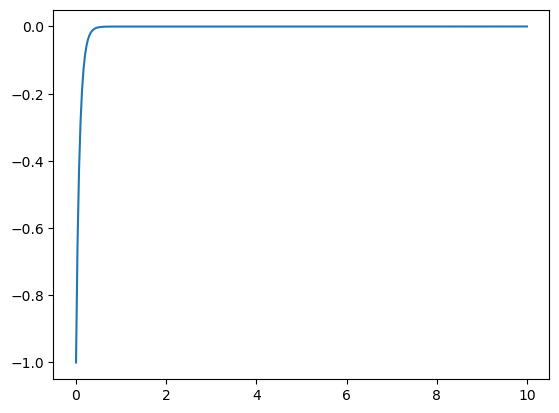

In [4]:
y = Inst3
# lambda_=l
# D=1
# karra = np.linspace(-10, 10, 200)
# k2 = [karra[np.argmax([k*y[i] - D/2*k**2 - lambda_*(np.cosh(a*k)-1) for k in karra])] for i in range(0,len(y))]
plt.plot(np.linspace(0, tm, N), y)


In [3]:
tmax = 10
N = 300
def dpotential(x):
    return x**3 - x
def phi(x):
    return np.cosh(x) - 1
tau = 0.0
D2 = 1
lambda_ = l

m_2 = np.linspace(-10, 10, 1000)
initial = np.ones_like(m_2)*(1e-4)

def solver2( m_2, initial, lambda_=0.01, a=10, b=1/2):
        def Eq2(k, m, a, lambda_):
            #print(k, np.cosh(a*k))
            return  k * m- D2/2 * k**2 - lambda_ * phi(a*k)#(np.cosh(a*k) - 1)

        k = np.linspace(-10, 10, 4000)

        K = []
        for M in m_2:
            e = Eq2(k, M, a, lambda_)
            f = np.argmax(e)
            K.append(k[f])
    

        return K
Leg = solver2(m_2=m_2, initial=initial, lambda_=lambda_, a=a)
Legendre = interp1d(m_2, Leg, kind="linear")

def MSR_action(q):
    
    delta_t = tmax / N

    q[0] = -1
    q[-1] = 0
    ydot = np.zeros(N-2)
    qdot = (q[1:] - q[:-1]) / delta_t
    y = qdot + dpotential(q[:-1])
    ydot[:] = (y[1:] - y[:-1]) / delta_t
    k2 = Legendre(tau * ydot + y[:-1])
    print(k2)
    print(y)

    #karra = np.linspace(-10, 10, 100)
    #k2 = [karra[np.argmax([k*y[i] - self.D2/2 * k**2 - self.lambda_*self.phi(self.a*k) for k in karra])] for i in range(len(y))]
    
    S = 0
    
    for i in range(N - 2):
        print(0)
        S +=  k2[i] * (tau * ydot[i] + y[i]) - D2 / 2 * k2[i] ** 2 - lambda_ * phi(a * k2[i]) 
    return S * delta_t

print(MSR_action(y))

[-1.14002515e-05 -1.28666598e-05 -1.26788212e-05 -1.00567331e-05
 -8.36542535e-06 -1.58905905e-05 -1.27616871e-05 -9.54390950e-06
 -1.48086850e-05 -1.00811376e-05 -1.19275883e-05 -1.32560307e-05
 -1.08443869e-05 -1.43016946e-05 -1.17102802e-05 -8.50046638e-06
 -1.23363009e-05 -1.04385254e-05 -7.26794485e-06 -1.04723658e-05
 -9.83026447e-06 -9.89972504e-06 -1.15818469e-05 -9.43007841e-06
 -1.17703307e-05 -1.03661995e-05 -7.07022678e-06 -1.06984359e-05
 -8.35459227e-06 -3.92336888e-06 -5.89226925e-06 -2.04653144e-06
 -9.75741622e-07 -2.02065013e-06 -5.05362047e-07 -4.13711865e-07
 -1.76022083e-06 -6.83957120e-07 -3.51368219e-06 -5.85387488e-06
 -3.55138619e-06 -5.96922522e-06 -7.22736509e-06 -3.93184184e-06
 -2.36072229e-06 -3.69905260e-06 -1.38684142e-06 -5.88104607e-07
 -2.25643237e-07  1.26695669e-06 -1.71909773e-06 -1.33642320e-06
 -9.09737060e-07 -4.72986069e-06 -5.05724405e-06 -1.90987394e-06
 -2.97998168e-06 -4.38853282e-06 -1.87912495e-06 -1.48004584e-06
 -4.00103524e-06 -1.80637

In [3]:
karra = np.linspace(-10, 10, 200)
print(karra, karra**2)

[-10.          -9.89949749  -9.79899497  -9.69849246  -9.59798995
  -9.49748744  -9.39698492  -9.29648241  -9.1959799   -9.09547739
  -8.99497487  -8.89447236  -8.79396985  -8.69346734  -8.59296482
  -8.49246231  -8.3919598   -8.29145729  -8.19095477  -8.09045226
  -7.98994975  -7.88944724  -7.78894472  -7.68844221  -7.5879397
  -7.48743719  -7.38693467  -7.28643216  -7.18592965  -7.08542714
  -6.98492462  -6.88442211  -6.7839196   -6.68341709  -6.58291457
  -6.48241206  -6.38190955  -6.28140704  -6.18090452  -6.08040201
  -5.9798995   -5.87939698  -5.77889447  -5.67839196  -5.57788945
  -5.47738693  -5.37688442  -5.27638191  -5.1758794   -5.07537688
  -4.97487437  -4.87437186  -4.77386935  -4.67336683  -4.57286432
  -4.47236181  -4.3718593   -4.27135678  -4.17085427  -4.07035176
  -3.96984925  -3.86934673  -3.76884422  -3.66834171  -3.5678392
  -3.46733668  -3.36683417  -3.26633166  -3.16582915  -3.06532663
  -2.96482412  -2.86432161  -2.7638191   -2.66331658  -2.56281407
  -2.4623115

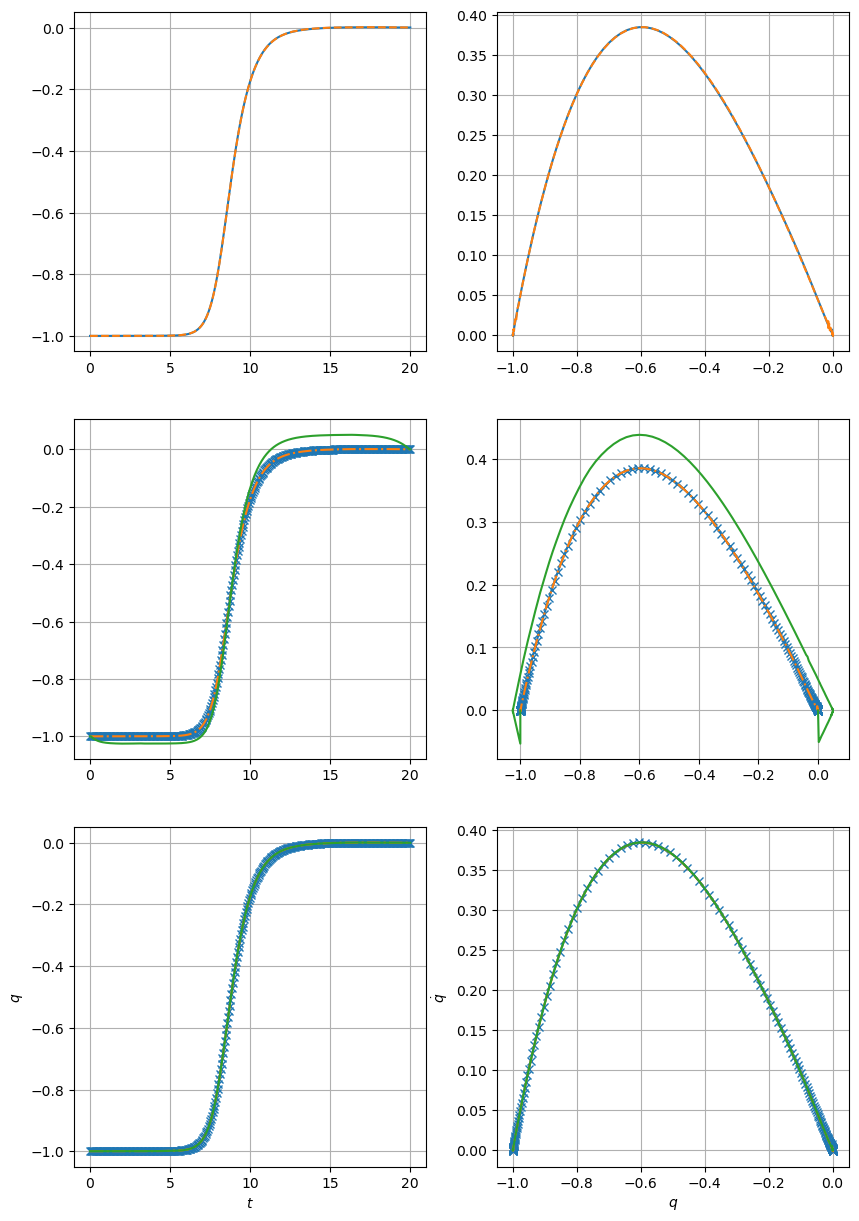

In [5]:

#print(Act, 0.5/(1 + l * a ** 2), Act/(2*0.25/(1 + l * a ** 2)), l, a, N, tm)
t = np.linspace(0, tm, N)

fig,ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

ax[0, 0].plot(t, Inst)
ax[0, 0].plot(t, Inst3, "--")

ax[0, 1].plot(Inst[:-1], (Inst[1:]-Inst[:-1])/dt, "-")
ax[0, 1].plot(Inst3[:-1], (Inst3[1:]-Inst3[:-1])/dt, "--")

ax[1, 0].plot(t, Inst2, "-x")
ax[1, 0].plot(t, Inst4, "-.")
ax[1, 0].plot(t, Inst5)

ax[1, 1].plot(Inst2[:-1], (Inst2[1:]-Inst2[:-1])/dt, "-x")
ax[1, 1].plot(Inst4[:-1], (Inst4[1:]-Inst4[:-1])/dt, "-.")
ax[1, 1].plot(Inst5[:-1], (Inst5[1:]-Inst5[:-1])/dt)

ax[2, 0].plot(t, Inst6, "-x")
ax[2, 0].plot(t, Inst7, "-.")
ax[2, 0].plot(t, Inst8)

ax[2, 1].plot(Inst6[:-1], (Inst6[1:]-Inst6[:-1])/dt, "-x")
ax[2, 1].plot(Inst7[:-1], (Inst7[1:]-Inst7[:-1])/dt, "-.")
ax[2, 1].plot(Inst8[:-1], (Inst8[1:]-Inst8[:-1])/dt)

for i in range(3):
    for j in range(2):
        ax[i, j].grid()

ax[2, 0].set_xlabel(r"$t$")
ax[2, 0].set_ylabel(r"$q$")
ax[2, 1].set_xlabel(r"$q$")
ax[2, 1].set_ylabel(r"$\dot{q}$")
plt.show()

In [3]:
N = np.array([100, 200, 500, 1000, 2000])
tm = 20
a = 10
l = np.logspace(-5, 2, base=10, num=20, endpoint=True)
l = 1e-12
dt = tm/N

S = []

for n in N:
    S.append(action_adj(tau=0.0, pot="m", ini=-1, fin=0, N=n, tm=tm, maxiter=1500, a=a, lambd=l)[0])


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.47191467366106715
            Iterations: 34
            Function evaluations: 3468
            Gradient evaluations: 34
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.47318974436031314
            Iterations: 62
            Function evaluations: 12525
            Gradient evaluations: 62
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.47353592842549047
            Iterations: 136
            Function evaluations: 68405
            Gradient evaluations: 136
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.47359479642655694
            Iterations: 249
            Function evaluations: 249746
            Gradient evaluations: 249
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.47362128690718075
            Iterations: 464
  

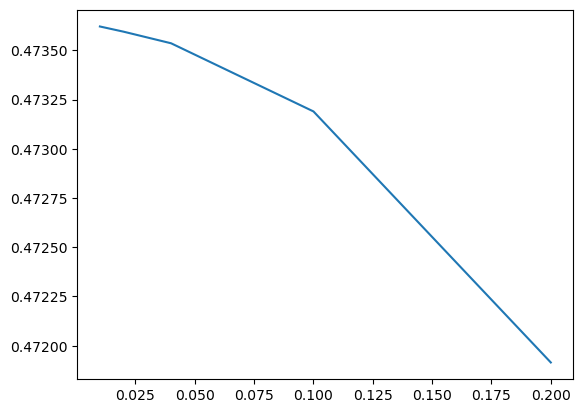

In [5]:
plt.plot(tm/N, S)

plt.show()